In [88]:
import pandas as pd

### Curva ROC  Receiver Operating Characteristic

- Muestra la tasa entre FP y TP 

- En el eje x va  (1 - especificidad) $(1- \frac{TN}{TN + FP})$  vs el eje y que va la sensibilidad ( $\frac{TP}{TP + FN}$)
- El AUC es el area bajo del curva de la curva ROC

In [89]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
target_names = iris.target_names
X, y = iris.data, iris.target
y = iris.target_names[y]

random_state = np.random.RandomState(0)

n_samples, n_features = X.shape
n_classes = len(np.unique(y))

X = np.concatenate([X, random_state.randn(n_samples, 200 * n_features)], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=0)

In [90]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

In [91]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(75, 3)

En el siguiente gráfico mostramos la curva ROC resultante al considerar las flores del iris como “virginica” ( class_id=2) o “no virginica” (el resto).

In [92]:
class_of_interest = "virginica"

class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

2

La estrategia multiclase Uno contra el Resto (OvR), también conocida como uno contra todos, consiste en calcular una curva ROC para cada uno de los n_classes. En cada paso, una clase determinada se considera la clase positiva y las clases restantes se consideran la clase negativa en su conjunto.

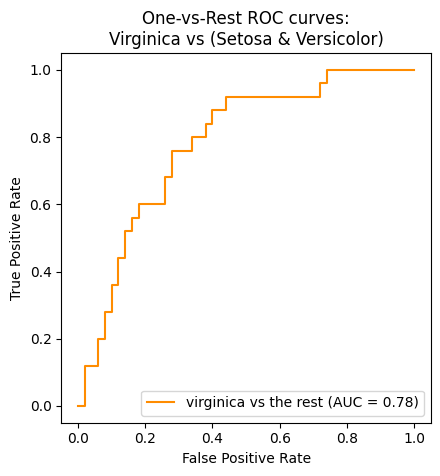

In [93]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange"
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)")
plt.legend()
plt.show()

### Teorema de Bayes (clasificador de Naive Bayes)

### HiperParametros

### Evaluacion Modelos de clasificacion

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


#### Carga de data

In [95]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

##### Division de datos


In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.30, random_state=42)

#### Normalizacion

In [97]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train_sc = sc_X.fit_transform(X_train)

X_test_sc = sc_X.transform(X_test)

##### Modelo knn


In [98]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=40)

#### Entrenamiento

In [99]:
knn.fit(X_train_sc,y_train)

KNeighborsClassifier(n_neighbors=40)

##### Prediccion

In [100]:
y_train_pred = knn.predict(X_train_sc)

y_test_pred = knn.predict(X_test_sc)

#### Validacion del modelo

In [101]:
from sklearn.metrics import confusion_matrix 

matrix_train = confusion_matrix(y_train,y_train_pred)

matrix_test = confusion_matrix(y_test,y_test_pred)

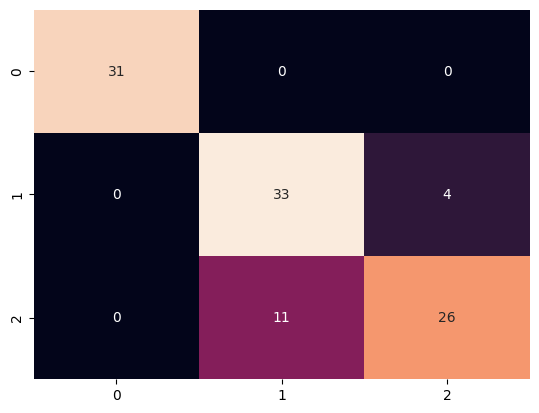

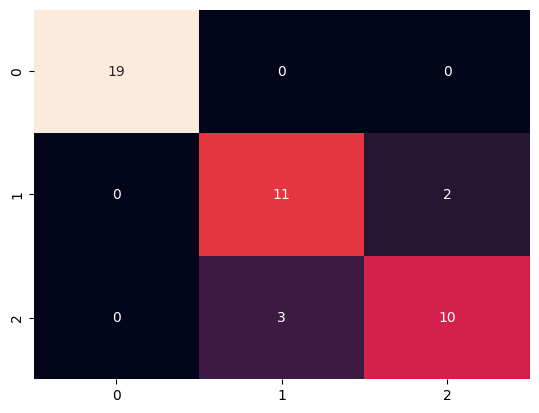

In [102]:
import seaborn as sns 

sns.heatmap(matrix_train,annot=True,cbar=False)
plt.show()
sns.heatmap(matrix_test,annot=True,cbar=False)
plt.show()


#### medidas de error

## Exactitud

In [103]:
from sklearn.metrics import accuracy_score, precision_score

accuracy_score(y_test,y_test_pred)

0.8888888888888888

## Precisión

In [104]:
from sklearn.metrics import precision_score

precision_score(y_test, y_test_pred, average= None)

array([1.        , 0.78571429, 0.83333333])

## Exhaustividad/Recall/Sensibilidad

In [105]:
from sklearn.metrics import recall_score

recall_score(y_test, y_test_pred, average = None)

array([1.        , 0.84615385, 0.76923077])

## F1-Score

In [106]:
from sklearn.metrics import f1_score

f1_score(y_test, y_test_pred, average = None)

array([1.        , 0.81481481, 0.8       ])

#### Binarizacion de etiqueta

In [107]:
from sklearn.preprocessing import label_binarize

y_test = label_binarize(y_test, classes=[0,1,2])

n_classes = y_test.shape[1]


#### Prediccion

- Si se usa predict_proba, no se toma un umbral del 50%, solo retorna la probabilidad de pertenecer a cada clase

In [108]:
y_predic_prob = knn.predict_proba(X_test_sc)

print(y_predic_prob[:5])

[[0.    0.7   0.3  ]
 [0.75  0.25  0.   ]
 [0.    0.225 0.775]
 [0.    0.675 0.325]
 [0.    0.525 0.475]]


#### Curva Roc

- tasa de falsos positivos: fpr
- tasa de  true positives: tpr 

In [113]:
y_score = knn.predict_proba(X_test)

In [121]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test[:,i],y_score[:,i])
  roc_auc[i] = auc(fpr[i],tpr[i])


In [120]:
roc_curve(y_test[:,0],y_score[:,0])

(array([0., 0., 0., 1.]),
 array([0.        , 0.15789474, 0.36842105, 1.        ]),
 array([1.05 , 0.05 , 0.025, 0.   ]))

### Grafica de la curva ROC

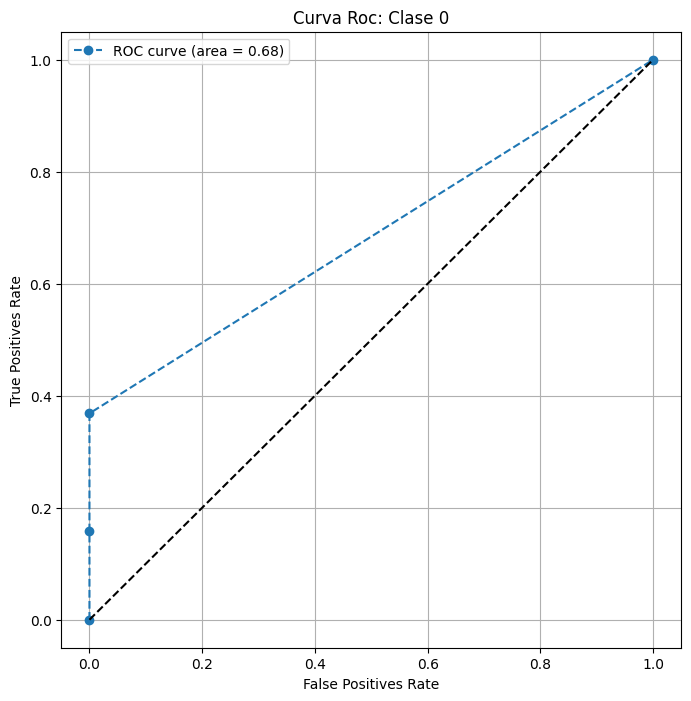

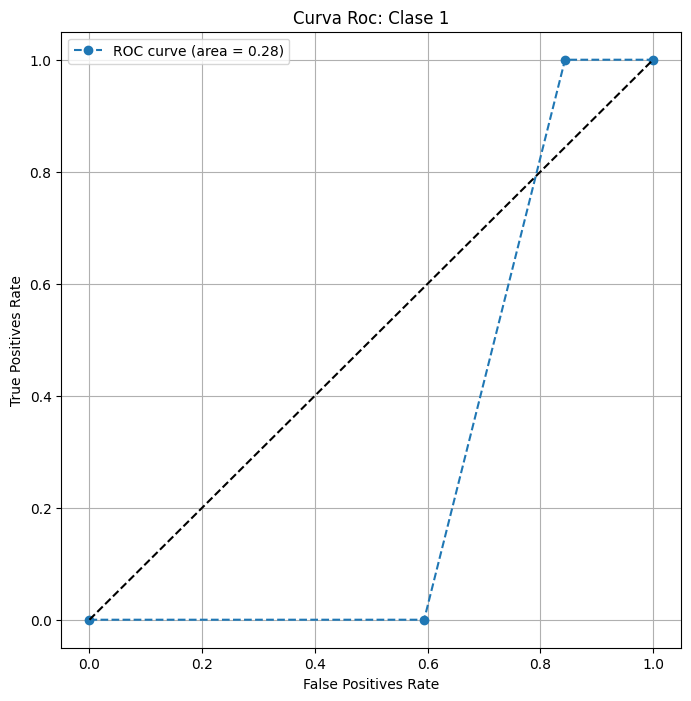

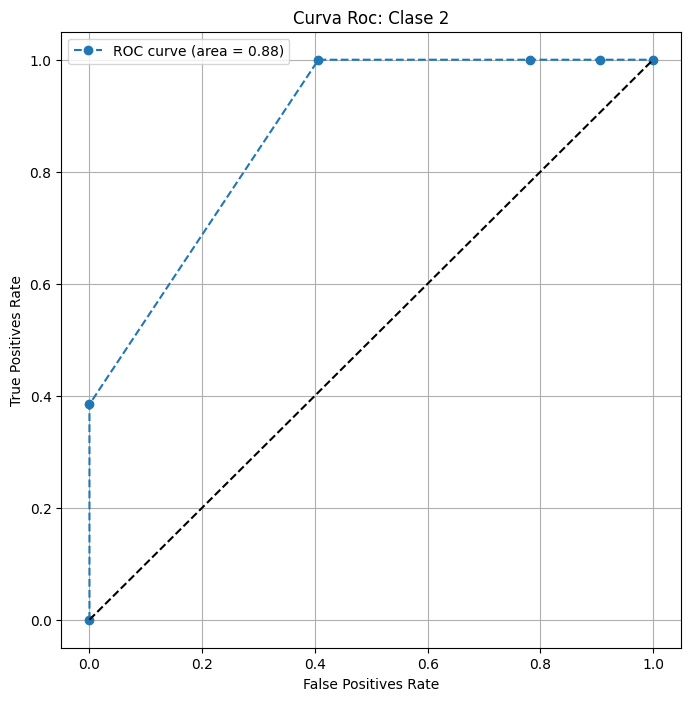

In [125]:
for i in range(n_classes):
  plt.figure(figsize=(8,8))
  plt.plot(fpr[i] , tpr[i],'o--',label= 'ROC curve (area = %0.2f)' %roc_auc[i])
  plt.plot([0,1],[0,1],'k--')
  plt.xlabel('False Positives Rate')
  plt.ylabel('True Positives Rate')
  plt.title(f'Curva Roc: Clase {str(i)}')
  plt.legend()
  
  plt.grid()
  plt.show()

#### Problemas multiclase

In [126]:
from sklearn.preprocessing import LabelBinarizer 
from sklearn.metrics import roc_auc_score 

def multiclass_roc_auc_score(y_test, y_pred, average = 'macro'):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  return (roc_auc_score(y_test,y_pred,average=average))


In [127]:
print('El AUC-roc multiclase:', multiclass_roc_auc_score(y_test,y_test_pred))



El AUC-roc multiclase: 0.9098557692307692
